<p style="font-family: Arial; font-size:2.25em;color:purple; font-style:bold"><br>
 探索评论与商品价格之间的关系</p><br>
 
 因为使用API自动提取典型意见，无效评论被自动过滤，所以没有处理无效评论，但是无效数据还是简单过滤了一下


In [309]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

查看价格和评分数据
</p>

跳过英文标签row1，产品编码按字符串读取防止变化

In [454]:
pr = pd.read_csv('jd_price_ratings.csv',skiprows=[1],dtype={'产品编码':str})
print(type(pr))
pr.head(5)

<class 'pandas.core.frame.DataFrame'>


,产品编码,产品名称,产品参数,产品类型,价格,平均得分,好评率,差评率,好评数,中评数,差评数,追评数
0,30113544,Rain in the Afternoon,[],数字内容,27.99,4,1.0,0.0,3,0,0,0
1,30391529,Connectedness and Contagion,[],数字内容,295.18,5,1.0,0.0,0,0,0,0
2,30391530,Contract Theory,[],数字内容,699.22,5,1.0,0.0,0,0,0,0
3,30391743,"Technology, Energy, and Health (Entering the S...",[],数字内容,7.69,5,1.0,0.0,0,0,0,0
4,30396219,CAM Coach,[],数字内容,110.02,5,1.0,0.0,0,0,0,0


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
检查数据类型
</p>

In [455]:
pr.dtypes

产品编码     object
产品名称     object
产品参数     object
产品类型     object
价格      float64
平均得分      int64
好评率     float64
差评率     float64
好评数       int64
中评数       int64
差评数       int64
追评数       int64
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
丢掉重复数据
</p>

In [456]:
pr.shape

(10849, 12)

In [457]:
pr1 = pr.drop_duplicates(['产品编码'])
pr2 = pr.drop_duplicates()

In [458]:
pr1.shape

(10842, 12)

In [459]:
pr2.shape

(10842, 12)

对比pr,pr1,pr2的变化，那些"所有列都重复的数据"被删除。

In [460]:
pr = pr2
pr.shape

(10842, 12)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
抽出数字内容类,数据储存在ebpr(ebook price ratings)
</p>

+ print 所有类型
+ filter:把'产品类型' == '数字内容' 的row储存在ebpr中
+ 数字内容指的是电子书（官网验证过）
+ 选数字内容是为了尽量减少成本对价格的影响

In [468]:
ebpr = pr[pr['产品类型'].isin(['数字内容','图书'])]
ebpr.head()

,产品编码,产品名称,产品参数,产品类型,价格,平均得分,好评率,差评率,好评数,中评数,差评数,追评数
0,30113544,Rain in the Afternoon,[],数字内容,27.99,4,1.0,0.0,3,0,0,0
1,30391529,Connectedness and Contagion,[],数字内容,295.18,5,1.0,0.0,0,0,0,0
2,30391530,Contract Theory,[],数字内容,699.22,5,1.0,0.0,0,0,0,0
3,30391743,"Technology, Energy, and Health (Entering the S...",[],数字内容,7.69,5,1.0,0.0,0,0,0,0
4,30396219,CAM Coach,[],数字内容,110.02,5,1.0,0.0,0,0,0,0


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
对图书类和数字内容类做描述性统计
</p>

+ 使用pandas的describe方法。By default only numeric fields are returned.

In [469]:
ebpr.describe()

,价格,平均得分,好评率,差评率,好评数,中评数,差评数,追评数
count,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000
mean,75.998795,4.992577,0.995744,0.001589,2233.706363,14.807635,5.796819,4.357264
std,270.945793,0.118086,0.034075,0.023345,15132.573325,113.008280,39.717355,33.764991
min,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.700000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,5.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
max,10064.000000,5.000000,1.000000,1.000000,410000.000000,3700.000000,1100.000000,1400.000000


In [470]:
ebpr.shape

(9430, 12)

分析：
+ count: 没有缺失值,数据数量和数据行数都是334
+ 好评数的方差和最大值有点不正常
+ 中差评数量75%以下全是零。

箱线图和散点图

<Figure size 432x288 with 0 Axes>

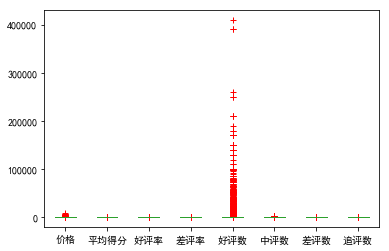

In [471]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.figure()
ebpr.plot.box(sym='r+') #异常值用红色的+表示

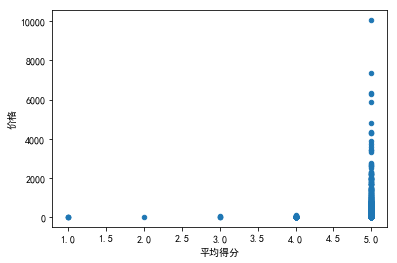

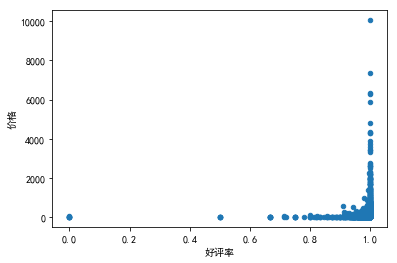

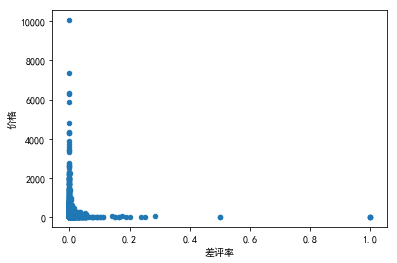

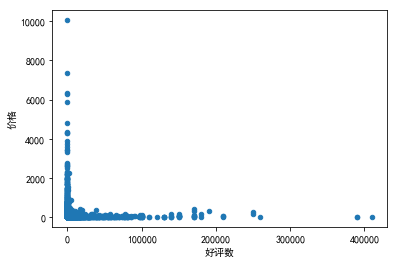

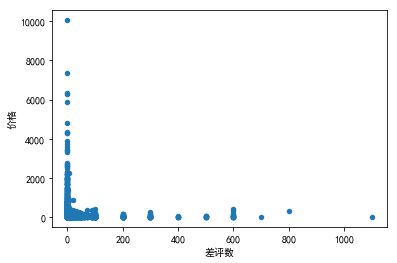

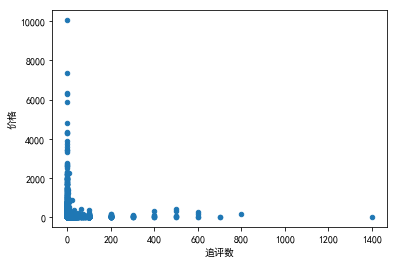

In [485]:
data2 = ebpr
data2.plot.scatter(x='平均得分',y='价格')
data2.plot.scatter(x='好评率',y='价格')
data2.plot.scatter(x='差评率',y='价格')
data2.plot.scatter(x='好评数',y='价格')
data2.plot.scatter(x='差评数',y='价格')
data2.plot.scatter(x='追评数',y='价格')

这是在价格没有标准化的情况下。
还是可以看出来随着好评率向1.0靠近，价格是有升高的。

但是后面标准化和取对数后的图看不懂

<Figure size 432x288 with 0 Axes>

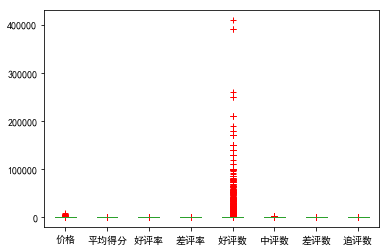

In [474]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
plt.figure()
data1 = ebpr.loc[ebpr['价格']>1]
data1.plot.box(sym='r+')

好评数量的异常值我觉得是可以接受的，因为评论数量确实可能会突然多出来很多,但也不排除是刷出来的

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

数据标准化
</p>

+ log
+ （x-mean）/std


用一个非常非常小的数代替零值,然后全表取对数

In [475]:
ebpr.replace(0,0.00000000001,inplace=True)
ebpr

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,产品编码,产品名称,产品参数,产品类型,价格,平均得分,好评率,差评率,好评数,中评数,差评数,追评数
0,30113544,Rain in the Afternoon,[],数字内容,2.799000e+01,4,1.000,1.000000e-11,3.000000e+00,1.000000e-11,1.000000e-11,1.000000e-11
1,30391529,Connectedness and Contagion,[],数字内容,2.951800e+02,5,1.000,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
2,30391530,Contract Theory,[],数字内容,6.992200e+02,5,1.000,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
3,30391743,"Technology, Energy, and Health (Entering the S...",[],数字内容,7.690000e+00,5,1.000,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
4,30396219,CAM Coach,[],数字内容,1.100200e+02,5,1.000,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
93,30123496,爱（节选自《好好爱自己》）（免费）,[],数字内容,1.000000e-11,4,0.898,5.100000e-02,3.000000e+01,2.000000e+00,2.000000e+00,1.000000e-11
94,30108085,礼仪实用百科,[],数字内容,1.000000e-11,5,0.875,1.000000e-11,1.000000e+01,2.000000e+00,1.000000e-11,1.000000e-11
95,30319406,如何问，别人才肯说（试读本）,[],数字内容,1.000000e-11,5,1.000,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
96,30325339,强势：如何在工作、恋爱和人际交往中快速取得主导权？（试读本）,[],数字内容,1.000000e-11,5,1.000,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
97,30341195,人生没有白走的路，每一步都算数（试读本）,[],数字内容,1.000000e-11,5,1.000,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11


In [478]:
data2 = np.log10(ebpr.iloc[:,4:])
data2

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


,价格,平均得分,好评率,差评率,好评数,中评数,差评数,追评数
0,1.447003,0.60206,0.000000,-11.000000,0.477121,-11.000000,-11.000000,-11.00000
1,2.470087,0.69897,0.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.00000
2,2.844614,0.69897,0.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.00000
3,0.885926,0.69897,0.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.00000
4,2.041472,0.69897,0.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.00000
93,-11.000000,0.60206,-0.046724,-1.292430,1.477121,0.301030,0.301030,-11.00000
94,-11.000000,0.69897,-0.057992,-11.000000,1.000000,0.301030,-11.000000,-11.00000
95,-11.000000,0.69897,0.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.00000
96,-11.000000,0.69897,0.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.00000
97,-11.000000,0.69897,0.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.00000


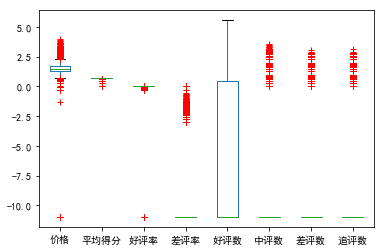

In [483]:
data2.plot.box(sym='r+') #异常值用红色的+表示

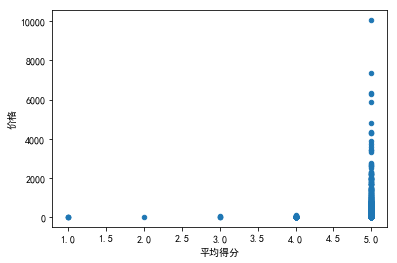

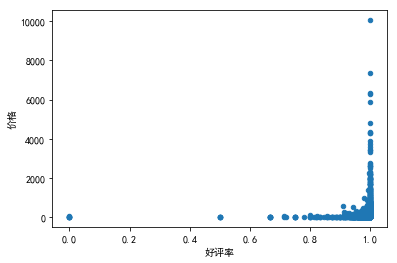

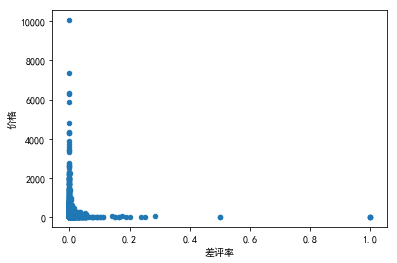

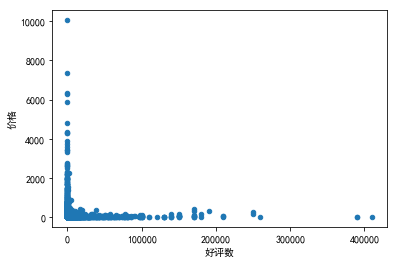

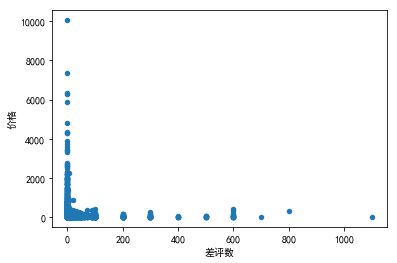

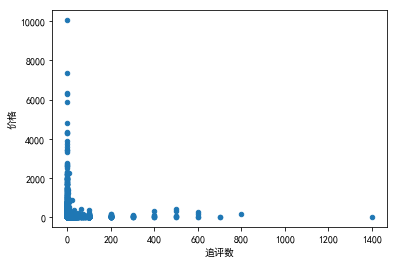

In [486]:
data2.plot.scatter(x='平均得分',y='价格')
data2.plot.scatter(x='好评率',y='价格')
data2.plot.scatter(x='差评率',y='价格')
data2.plot.scatter(x='好评数',y='价格')
data2.plot.scatter(x='差评数',y='价格')
data2.plot.scatter(x='追评数',y='价格')

这惨不忍睹的图，这都是些什么鬼

标准化

In [480]:
data3 = data2.apply(lambda col:(col-col.mean())/col.std())
data3

,价格,平均得分,好评率,差评率,好评数,中评数,差评数,追评数
0,-0.031433,-5.668829,0.032737,-0.362675,1.198470,-0.399618,-0.377248,-0.361447
1,0.925133,0.051632,0.032737,-0.362675,-0.688695,-0.399618,-0.377248,-0.361447
2,1.275309,0.051632,0.032737,-0.362675,-0.688695,-0.399618,-0.377248,-0.361447
3,-0.556030,0.051632,0.032737,-0.362675,-0.688695,-0.399618,-0.377248,-0.361447
4,0.524385,0.051632,0.032737,-0.362675,-0.688695,-0.399618,-0.377248,-0.361447
93,-11.669170,-5.668829,-0.123135,3.145217,1.362898,2.289938,2.469027,-0.361447
94,-11.669170,0.051632,-0.160727,-0.362675,1.284446,2.289938,-0.377248,-0.361447
95,-11.669170,0.051632,0.032737,-0.362675,-0.688695,-0.399618,-0.377248,-0.361447
96,-11.669170,0.051632,0.032737,-0.362675,-0.688695,-0.399618,-0.377248,-0.361447
97,-11.669170,0.051632,0.032737,-0.362675,-0.688695,-0.399618,-0.377248,-0.361447


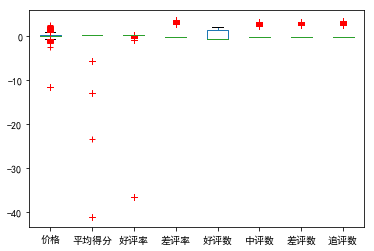

In [484]:
data3.plot.box(sym='r+') #异常值用红色的+表示

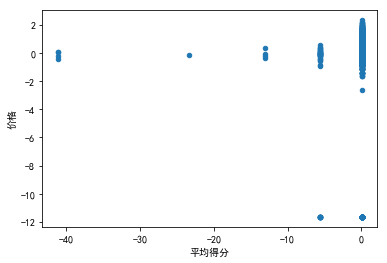

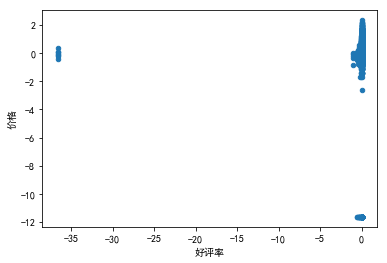

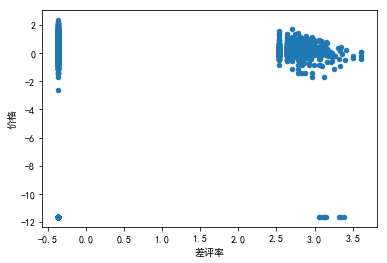

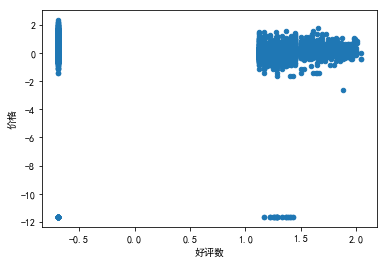

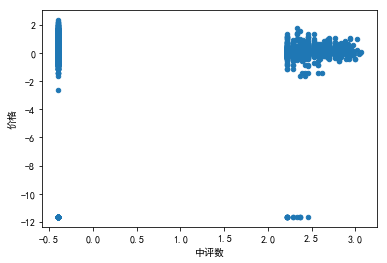

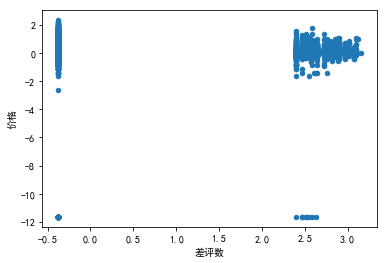

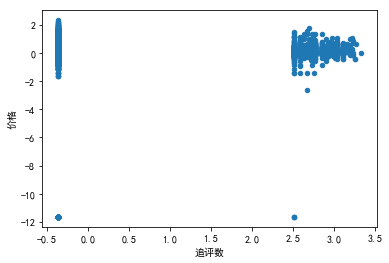

In [487]:
data3.plot.scatter(x='平均得分',y='价格')
data3.plot.scatter(x='好评率',y='价格')
data3.plot.scatter(x='差评率',y='价格')
data3.plot.scatter(x='好评数',y='价格')
data3.plot.scatter(x='中评数',y='价格')
data3.plot.scatter(x='差评数',y='价格')
data3.plot.scatter(x='追评数',y='价格')

评价数量=sum(好中差追），追数很重要

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

查看评论内容
</p>

In [15]:
comments = pd.read_excel('jd详细评价数据.xlsx')
print(type(comments))
comments.head(5)

<class 'pandas.core.frame.DataFrame'>


,产品编码,用户昵称,用户等级,用户等级名称,用户平台类型,用户平台名称,是否来自移动端,购买产品时间,评论间隔时间,写评论时间,评分,评价,评价有用数,评价无用数,回复数,追评间隔时间,追评
0,sku_id,nickname,user_level_id,user_level_name,user_client,user_client_show,is_mobile,reference_time,days,creation_time,score,content,useful_vote_count,useless_vote_count,reply_count,after_days,after_user_comment
1,12181007,p***9,62,PLUS会员,4,来自京东Android客户端,True,2017-11-18 13:51:07,25,2017-12-13 19:37:00,5,一直喜欢连环画 书的质量不错 细细品味吧??,0,0,0,0,NaN
2,1649436491,w***j,105,PLUS会员,4,来自京东Android客户端,True,2017-12-14 06:13:10,5,2017-12-19 17:16:21,5,不错的东西，很厚实的一大本，质量很好,0,0,0,0,NaN
3,11793241640,y***n,105,PLUS会员,4,来自京东Android客户端,True,2017-12-06 07:42:01,46,2018-01-21 19:22:03,5,好，好好，非常好，京东自营，没得说了，一直支持。,0,0,0,0,NaN
4,1293015614,a***6,105,钻石会员,0,NaN,False,2017-04-17 12:46:53,5,2017-04-22 10:31:44,5,很不错，送货速度快，毛笔用着比以前买的爽多了，好货就是好货，哈哈,0,0,0,5,很不错，送货速度快，毛笔用着比以前买的爽多了，好货就是好货，哈哈


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

在特定种类商品范围内，价格与评论的关系。
</p>

分别选择图书、珠宝、电子商品
